#GI Tract Image Segmentation Challenge - EDA

# Installing required packages

In [ ]:
!pip install tensorflow-addons==0.16.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 


In [ ]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandarallel: filename=pandarallel-1.6.3-py3-none-any.whl size=16463 sha256=96acd06a103afc9922541b3a5e14463d542093229b11a86b17f42deced50657d
  Stored in directory: /root/.cache/pip/wheels/3c/a4/19/02a1f08d032a017d5d7e22da595aa652ba0a2f2e22de73981b
Successfully built pandarallel


In [ ]:
!pip install kaggledatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("\n... Importing the required packages and modules for visualization and machine learning ...\n")

# Machine Learning and Data Science Imports
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import tensorflow_hub as tfhub; print(f"\t\t– TENSORFLOW HUB VERSION: {tfhub.__version__}");
import tensorflow_addons as tfa; print(f"\t\t– TENSORFLOW ADDONS VERSION: {tfa.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(f"\t\t– SKLEARN VERSION: {sklearn.__version__}");
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from pandarallel import pandarallel; pandarallel.initialize();
from sklearn.model_selection import GroupKFold, StratifiedKFold
from scipy.spatial import cKDTree

# # RAPIDS
# import cudf, cupy, cuml
# from cuml.neighbors import NearestNeighbors
# from cuml.manifold import TSNE, UMAP

# Built In Imports
#from kaggle_datasets import KaggleDatasets
from collections import Counter
from datetime import datetime
from glob import glob
import warnings
import requests
import hashlib
import imageio
import IPython
import sklearn
import urllib
import zipfile
import pickle
import random
import shutil
import string
import json
import math
import time
import gzip
import ast
import sys
import io
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm; tqdm.pandas();
import plotly.express as px
import seaborn as sns
from PIL import Image, ImageEnhance
import matplotlib; print(f"\t\t– MATPLOTLIB VERSION: {matplotlib.__version__}");
from matplotlib import animation, rc; rc('animation', html='jshtml')
import plotly
import PIL
import cv2

import plotly.io as pio
print(pio.renderers)

def seed_it_all(seed=7):
    """ Attempt to be Reproducible """
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    
print("\n\n... IMPORTS COMPLETE ...\n")


... Importing the required packages and modules for visualization and machine learning ...

		– TENSORFLOW VERSION: 2.8.2
		– TENSORFLOW HUB VERSION: 0.12.0
		– TENSORFLOW ADDONS VERSION: 0.16.1
		– NUMPY VERSION: 1.21.6
		– SKLEARN VERSION: 1.0.2
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
		– MATPLOTLIB VERSION: 3.2.2
Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



... IMPORTS COMPLETE ...



In [ ]:
import kaggledatasets as KaggleDatasets

# Background Info

In [ ]:
# The Actual background information behind the problem.

In [ ]:
#Analyzing MRI scans to build a model for segmenting the stomach and intestines automatically. 
#The MRI scans were taken during radiation treatment from actual cancer patients who had 1-5 MRI scans on separate days. 
#To help cancer patients get better treatment, we should build a deep learning algorithm based on these scans.


In [ ]:
'''
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
'''

'\nfrom google.colab import files\nfrom IPython.display import Image\nuploaded = files.upload()\n'

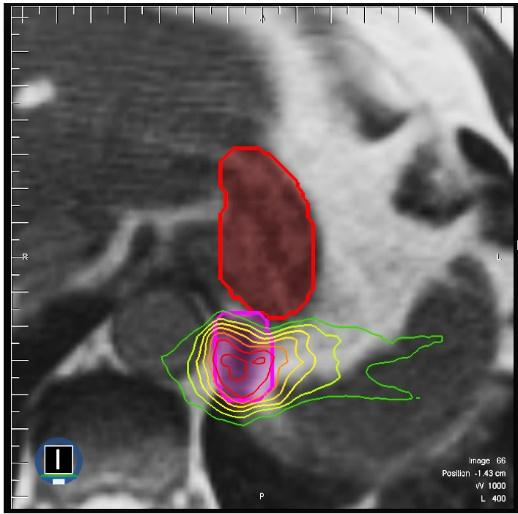

In [ ]:
#Image('Segmented.jpg')

In [ ]:
#The tumor above (pink thick line) is close to the stomach (red thick line). High doses of radiation are directed to the tumor while avoiding the stomach. 
#Dose levels are represented by colour. Higher doses are represented by red and lower doses are represented by green.

# Using Dice coefficient and hausdroff distance

In [ ]:
#The model is build using the logic of 2 criteria mean Dice coefficient and 3D Hausdorff distance. 
#The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth.

#Hausdorff distance is a method for calculating the distance between segmentation objects A and B, by calculating the furthest point on object A from the nearest point on object B.
#For 3D Hausdorff, we construct 3D volumes by combining each 2D segmentation with slice depth as the Z coordinate and then find the Hausdorff distance between them



# General Info

##Here we are segmenting organs cells in images.The training annotations are provided as RLE-encoded masks, and the images are in 16-bit, grayscale, PNG format.Each case in this competition is represented by multiple sets of scan slices. Each set is identified by the day the scan took place Some cases are split by time early days are in train later days are in test. Some cases are split by case the entirety of the case is in train or test.

In [ ]:
#The main goal is to be able to generalize to both partially and wholly unseen cases.
#In the given dataset the test set is entirely unseen which is roughly 50 cases 
#Note that, in this case, the test set is entirely unseen. It contains a varying number of days and slices, (similar to the training set)


In [ ]:
# The file information in train.csv.

#It contains IDs and masks for all training objects.
#*id: unique identifier for object
#*class:the predicted class for the object
#8EncodedPixels:RLE-encoded pixels for the identified object


# Data Definition and initilizations

In [ ]:
print("\n... DATA ACCESS SETUP STARTED ...\n")

# Local path to training and validation images
DATA_DIR = "/content/drive/MyDrive/Untitled folder/uw-madison-gi-tract-image-segmentation"
save_locally = None
load_locally = None

print(f"\n... DATA DIRECTORY PATH IS:\n\t--> {DATA_DIR}")

print(f"\n... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")

print("\n\n... DATA ACCESS SETUP COMPLETED ...\n")


... DATA ACCESS SETUP STARTED ...


... DATA DIRECTORY PATH IS:
	--> /content/drive/MyDrive/Untitled folder/uw-madison-gi-tract-image-segmentation

... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:
	--> /content/drive/MyDrive/Untitled folder/uw-madison-gi-tract-image-segmentation/sample_submission.csv
	--> /content/drive/MyDrive/Untitled folder/uw-madison-gi-tract-image-segmentation/train.csv
	--> /content/drive/MyDrive/Untitled folder/uw-madison-gi-tract-image-segmentation/train


... DATA ACCESS SETUP COMPLETED ...



# XLA optimizations: Optimizing the compilers for ML

In [ ]:
print(f"\n... XLA OPTIMIZATIONS STARTING ...\n")

print(f"\n... CONFIGURE JIT (JUST IN TIME) COMPILATION ...\n")
# enable XLA optmizations (10% speedup when using @tf.function calls)
tf.config.optimizer.set_jit(True)

print(f"\n... XLA OPTIMIZATIONS COMPLETED ...\n")


... XLA OPTIMIZATIONS STARTING ...


... CONFIGURE JIT (JUST IN TIME) COMPILATION ...


... XLA OPTIMIZATIONS COMPLETED ...



# Setting up the dataframe

In [ ]:
print("\n... BASIC DATA SETUP STARTING ...\n\n")

# Open the training dataframe and display the initial dataframe
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
train_df = pd.read_csv(TRAIN_CSV)

# Get all training images
all_train_images = glob(os.path.join(TRAIN_DIR, "**", "*.png"), recursive=True)

print("\n... ORIGINAL TRAINING DATAFRAME... \n")
display(train_df)

TEST_DIR = os.path.join(DATA_DIR, "test")
SS_CSV   = os.path.join(DATA_DIR, "sample_submission.csv")
ss_df = pd.read_csv(SS_CSV)

# Get all testing images if there are any
all_test_images = glob(os.path.join(TEST_DIR, "**", "*.png"), recursive=True)

print("\n\n\n... ORIGINAL SUBMISSION DATAFRAME... \n")
display(ss_df)

# For debugging purposes when the test set hasn't been substituted we will know
DEBUG=len(ss_df)==0

if DEBUG:
    TEST_DIR = TRAIN_DIR
    all_test_images = all_train_images
    ss_df = train_df.iloc[:10]
    ss_df = ss_df[["id", "class"]]
    ss_df["predicted"] = ""
    
    print("\n\n\n... DEBUG SUBMISSION DATAFRAME... \n")
    display(ss_df)

    

SF2LF = {"lb":"Large Bowel","sb":"Small Bowel","st":"Stomach"}
LF2SF = {v:k for k,v in SF2LF.items()}
print(f"\n\n\n... ARE WE DEBUGGING: {DEBUG}... \n")

print("\n... BASIC DATA SETUP FINISHED ...\n\n")


... BASIC DATA SETUP STARTING ...



... ORIGINAL TRAINING DATAFRAME... 



,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN





... ORIGINAL SUBMISSION DATAFRAME... 



,id,class,predicted





... DEBUG SUBMISSION DATAFRAME... 



,id,class,predicted
0,case123_day20_slice_0001,large_bowel,
1,case123_day20_slice_0001,small_bowel,
2,case123_day20_slice_0001,stomach,
3,case123_day20_slice_0002,large_bowel,
4,case123_day20_slice_0002,small_bowel,
5,case123_day20_slice_0002,stomach,
6,case123_day20_slice_0003,large_bowel,
7,case123_day20_slice_0003,small_bowel,
8,case123_day20_slice_0003,stomach,
9,case123_day20_slice_0004,large_bowel,





... ARE WE DEBUGGING: True... 


... BASIC DATA SETUP FINISHED ...





# downloading csv file 

In [ ]:
from google.colab import files

train_df.to_csv('t_df.csv')
files.download('t_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Preprocessing

In [ ]:
#Now updating dataframes with accessible extra information

In [ ]:
# the logic is initiated in a preprocessing function
#changing the column identifiers as follows:

#large_bowel --> lb
#small_bowel --> sb
#stomach --> st

In [ ]:
def get_filepath_from_partial_identifier(_ident, file_list):
    return [x for x in file_list if _ident in x][0]

def df_preprocessing(df, globbed_file_list, is_test=False):
    """ The preprocessing steps applied to get column information """
    # 1. Get Case-ID as a column (str and int)
    df["case_id_str"] = df["id"].apply(lambda x: x.split("_", 2)[0])
    df["case_id"] = df["id"].apply(lambda x: int(x.split("_", 2)[0].replace("case", "")))

    # 2. Get Day as a column
    df["day_num_str"] = df["id"].apply(lambda x: x.split("_", 2)[1])
    df["day_num"] = df["id"].apply(lambda x: int(x.split("_", 2)[1].replace("day", "")))

    # 3. Get Slice Identifier as a column
    df["slice_id"] = df["id"].apply(lambda x: x.split("_", 2)[2])

    # 4. Get full file paths for the representative scans
    df["_partial_ident"] = (globbed_file_list[0].rsplit("/", 4)[0]+"/"+ # /kaggle/input/uw-madison-gi-tract-image-segmentation/train/
                           df["case_id_str"]+"/"+ # .../case###/
                           df["case_id_str"]+"_"+df["day_num_str"]+ # .../case###_day##/
                           "/scans/"+df["slice_id"]) # .../slice_#### 
    _tmp_merge_df = pd.DataFrame({"_partial_ident":[x.rsplit("_",4)[0] for x in globbed_file_list], "f_path":globbed_file_list})
    df = df.merge(_tmp_merge_df, on="_partial_ident").drop(columns=["_partial_ident"])

    # 5. Get slice dimensions from filepath (int in pixels)
    df["slice_h"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[1]))
    df["slice_w"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[2]))

    # 6. Pixel spacing from filepath (float in mm)
    df["px_spacing_h"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[3]))
    df["px_spacing_w"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[4]))

    if not is_test:
        # 7. Merge 3 Rows Into A Single Row (As This/Segmentation-RLE Is The Only Unique Information Across Those Rows)
        l_bowel_df = df[df["class"]=="large_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"lb_seg_rle"})
        s_bowel_df = df[df["class"]=="small_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"sb_seg_rle"})
        stomach_df = df[df["class"]=="stomach"][["id", "segmentation"]].rename(columns={"segmentation":"st_seg_rle"})
        df = df.merge(l_bowel_df, on="id", how="left")
        df = df.merge(s_bowel_df, on="id", how="left")
        df = df.merge(stomach_df, on="id", how="left")
        df = df.drop_duplicates(subset=["id",]).reset_index(drop=True)
        df["lb_seg_flag"] = df["lb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["sb_seg_flag"] = df["sb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["st_seg_flag"] = df["st_seg_rle"].apply(lambda x: not pd.isna(x))
        df["n_segs"] = df["lb_seg_flag"].astype(int)+df["sb_seg_flag"].astype(int)+df["st_seg_flag"].astype(int)

    # 8. Reorder columns to the a new ordering (drops class and segmentation as no longer necessary)
    new_col_order = ["id", "f_path", "n_segs",
                     "lb_seg_rle", "lb_seg_flag",
                     "sb_seg_rle", "sb_seg_flag", 
                     "st_seg_rle", "st_seg_flag",
                     "slice_h", "slice_w", "px_spacing_h", 
                     "px_spacing_w", "case_id_str", "case_id", 
                     "day_num_str", "day_num", "slice_id",]
    if is_test: new_col_order.insert(1, "class")
    new_col_order = [_c for _c in new_col_order if _c in df.columns]
    df = df[new_col_order]
    
    return df

In [ ]:
print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...\n\n")

# 1. Get Case-ID as a column (str and int)
train_df["case_id_str"] = train_df["id"].apply(lambda x: x.split("_", 2)[0])
train_df["case_id"] = train_df["id"].apply(lambda x: int(x.split("_", 2)[0].replace("case", "")))

# 2. Get Day as a column
train_df["day_num_str"] = train_df["id"].apply(lambda x: x.split("_", 2)[1])
train_df["day_num"] = train_df["id"].apply(lambda x: int(x.split("_", 2)[1].replace("day", "")))

# 3. Get Slice Identifier as a column
train_df["slice_id"] = train_df["id"].apply(lambda x: x.split("_", 2)[2])

# 4. Get full file paths for the representative scans
train_df["_partial_ident"] = (TRAIN_DIR+"/"+ # /kaggle/input/uw-madison-gi-tract-image-segmentation/train/
                             train_df["case_id_str"]+"/"+ # .../case###/
                             train_df["case_id_str"]+"_"+train_df["day_num_str"]+ # .../case###_day##/
                             "/scans/"+train_df["slice_id"]) # .../slice_#### 
_tmp_merge_df = pd.DataFrame({"_partial_ident":[x.rsplit("_",4)[0] for x in all_train_images], "f_path":all_train_images})
train_df = train_df.merge(_tmp_merge_df, on="_partial_ident").drop(columns=["_partial_ident"])

# Minor cleanup of our temporary workaround
del _tmp_merge_df; gc.collect(); gc.collect()

# 5. Get slice dimensions from filepath (int in pixels)
train_df["slice_h"] = train_df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[1]))
train_df["slice_w"] = train_df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[2]))

# 6. Pixel spacing from filepath (float in mm)
train_df["px_spacing_h"] = train_df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[3]))
train_df["px_spacing_w"] = train_df["f_path"].apply(lambda x: str(x[:-4].rsplit("_",4)[4]))

# 7. Merge 3 Rows Into A Single Row (As This/Segmentation-RLE Is The Only Unique Information Across Those Rows)
l_bowel_train_df = train_df[train_df["class"]=="large_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"lb_seg_rle"})
s_bowel_train_df = train_df[train_df["class"]=="small_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"sb_seg_rle"})
stomach_train_df = train_df[train_df["class"]=="stomach"][["id", "segmentation"]].rename(columns={"segmentation":"st_seg_rle"})
train_df = train_df.merge(l_bowel_train_df, on="id", how="left")
train_df = train_df.merge(s_bowel_train_df, on="id", how="left")
train_df = train_df.merge(stomach_train_df, on="id", how="left")
train_df = train_df.drop_duplicates(subset=["id",]).reset_index(drop=True)
train_df["lb_seg_flag"] = train_df["lb_seg_rle"].apply(lambda x: not pd.isna(x))
train_df["sb_seg_flag"] = train_df["sb_seg_rle"].apply(lambda x: not pd.isna(x))
train_df["st_seg_flag"] = train_df["st_seg_rle"].apply(lambda x: not pd.isna(x))
train_df["n_segs"] = train_df["lb_seg_flag"].astype(int)+train_df["sb_seg_flag"].astype(int)+train_df["st_seg_flag"].astype(int)

# 8. Reorder columns to the a new ordering (drops class and segmentation as no longer necessary)
train_df = train_df[["id", "f_path", "n_segs",
                     "lb_seg_rle", "lb_seg_flag",
                     "sb_seg_rle", "sb_seg_flag", 
                     "st_seg_rle", "st_seg_flag",
                     "slice_h", "slice_w", "px_spacing_h", 
                     "px_spacing_w", "case_id_str", "case_id", 
                     "day_num_str", "day_num", "slice_id",]]

# 9. Display update dataframe
print("\n... UPDATED TRAINING DATAFRAME... \n")
display(train_df)

ss_df = df_preprocessing(ss_df, all_test_images, is_test=True)
print("\n\n\n... UPDATED SUBMISSION DATAFRAME... \n")
display(ss_df)

print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...\n\n")


... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...



... UPDATED TRAINING DATAFRAME... 



,id,f_path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id
0,case123_day20_slice_0001,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case123,123,day20,20,slice_0001
1,case123_day20_slice_0002,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case123,123,day20,20,slice_0002
2,case123_day20_slice_0003,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case123,123,day20,20,slice_0003
3,case123_day20_slice_0004,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case123,123,day20,20,slice_0004
4,case123_day20_slice_0005,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case123,123,day20,20,slice_0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case30,30,day0,0,slice_0140
38492,case30_day0_slice_0141,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case30,30,day0,0,slice_0141
38493,case30_day0_slice_0142,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case30,30,day0,0,slice_0142
38494,case30_day0_slice_0143,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.50,case30,30,day0,0,slice_0143





... UPDATED SUBMISSION DATAFRAME... 



,id,class,f_path,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id
0,case123_day20_slice_0001,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
1,case123_day20_slice_0001,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
2,case123_day20_slice_0001,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
3,case123_day20_slice_0002,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
4,case123_day20_slice_0002,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
5,case123_day20_slice_0002,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
6,case123_day20_slice_0003,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
7,case123_day20_slice_0003,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
8,case123_day20_slice_0003,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
9,case123_day20_slice_0004,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0004



... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...




In [ ]:
import pandas as pd

In [ ]:
#Converting the str into float values for train_df
#aaa['px_spacing_w'] = aaa['px_spacing_w'].replace(float(a))

train_df['px_spacing_w'] = pd.to_numeric(train_df['px_spacing_w'],errors='coerce')

In [ ]:
display(train_df)

,id,f_path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id
0,case123_day20_slice_0001,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0001
1,case123_day20_slice_0002,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0002
2,case123_day20_slice_0003,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0003
3,case123_day20_slice_0004,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0004
4,case123_day20_slice_0005,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0140
38492,case30_day0_slice_0141,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0141
38493,case30_day0_slice_0142,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0142
38494,case30_day0_slice_0143,/content/drive/MyDrive/Untitled folder/uw-madi...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0143


In [ ]:
#Converting the str into float values for ss_df
ss_df['px_spacing_w'] = pd.to_numeric(ss_df['px_spacing_w'],errors='coerce')

In [ ]:
display(ss_df)

,id,class,f_path,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id
0,case123_day20_slice_0001,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
1,case123_day20_slice_0001,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
2,case123_day20_slice_0001,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0001
3,case123_day20_slice_0002,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
4,case123_day20_slice_0002,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
5,case123_day20_slice_0002,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0002
6,case123_day20_slice_0003,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
7,case123_day20_slice_0003,small_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
8,case123_day20_slice_0003,stomach,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0003
9,case123_day20_slice_0004,large_bowel,/content/drive/MyDrive/Untitled folder/uw-madi...,266,266,1.5,1.5,case123,123,day20,20,slice_0004


In [ ]:
train_df.to_csv('MRI_train.csv')

In [ ]:
from google.colab import files
files.download('MRI_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ss_df.to_csv('sub_train.csv')

In [ ]:
from google.colab import files
files.download('sub_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Helper function(encoding decoding)

In [ ]:
# Helper Function

In [ ]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
# modified from: https://www.kaggle.com/inversion/run-length-decoding-quick-start

def rle_decode(mask_rle, shape, color=1):
    """ 
    Argumentss:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns: 
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    # Split the string by space, then convert it into a integer array
    s = np.array(mask_rle.split(), dtype=int)

    # Every even value is the start, every odd value is the "run" length
    starts = s[0::2] - 1
    lengths = s[1::2]
    ends = starts + lengths

    # The image image is actually flattened since RLE is a 1D "run"
    if len(shape)==3:
        h, w, d = shape
        img = np.zeros((h * w, d), dtype=np.float32)
    else:
        h, w = shape
        img = np.zeros((h * w,), dtype=np.float32)

    # The color here is actually just any integer you want!
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
        
    # Don't forget to change the image back to the original shape
    return img.reshape(shape)

# https://www.kaggle.com/namgalielei/which-reshape-is-used-in-rle

def rle_decode_top_to_bot_first(mask_rle, shape):
    """ 
    Arguments:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns:
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape((shape[1], shape[0]), order='F').T  # Reshape from top -> bottom first

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    """
    Arguments:
        img (np.array): 
            - 1 indicating mask
            - 0 indicating background
    
    Returns: 
        run length as string formated
    """
    
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def flatten_l_o_l(nested_list):
    """ Flatten a list of lists """
    return [item for sublist in nested_list for item in sublist]

def load_json_to_dict(json_path):
    """ tbd """
    with open(json_path) as json_file:
        data = json.load(json_file)
    return data

def tf_load_png(img_path):
    return tf.image.decode_png(tf.io.read_file(img_path), channels=3)

def open_gray16(_path, normalize=True, to_rgb=False):
    """ Helper to open files """
    if normalize:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535., axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535.
    else:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH), axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)

#Exploring the data

In [ ]:
def get_overlay(img_path, rle_strs, img_shape, _alpha=0.999, _beta=0.35, _gamma=0):
    _img = open_gray16(img_path, to_rgb=True)
    _img = ((_img-_img.min())/(_img.max()-_img.min())).astype(np.float32)
    _seg_rgb = np.stack([rle_decode(rle_str, shape=img_shape, color=1) if rle_str is not None else np.zeros(img_shape, dtype=np.float32) for rle_str in rle_strs], axis=-1).astype(np.float32)
    seg_overlay = cv2.addWeighted(src1=_img, alpha=_alpha, 
                                  src2=_seg_rgb, beta=_beta, gamma=_gamma)
    return seg_overlay

def examine_id(ex_id, df=train_df, plot_overlay=True, print_meta=False, plot_grayscale=False, plot_binary_segmentation=False):
    """ Wrapper function to allow for easy visual exploration of an example """
    print(f"\n... ID ({ex_id}) EXPLORATION STARTED ...\n\n")
    demo_ex = df[df.id==ex_id].squeeze()

    if print_meta:
        print(f"\n... WITH DEMO_ID=`{DEMO_ID}` WE HAVE THE FOLLOWING DEMO EXAMPLE TO WORK FROM... \n\n")
        display(demo_ex.to_frame())

    if plot_grayscale:
        print(f"\n\n... GRAYSCALE IMAGE PLOT ...\n")
        plt.figure(figsize=(12,12))
        plt.imshow(open_gray16(demo_ex.f_path), cmap="gray")
        plt.title(f"Original Grayscale Image For ID: {demo_ex.id}", fontweight="bold")
        plt.axis(False)
        plt.show()

    if plot_binary_segmentation:
        print(f"\n\n... BINARY SEGMENTATION MASKS ...\n")
        plt.figure(figsize=(20,10))
        for i, _seg_type in enumerate(["lb", "sb", "st"]):
            if pd.isna(demo_ex[f"{_seg_type}_seg_rle"]): continue
            plt.subplot(1,3,i+1)
            plt.imshow(rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1))
            plt.title(f"RLE Encoding For {SF2LF[_seg_type]} Segmentation", fontweight="bold")
            plt.axis(False)
        plt.tight_layout()
        plt.show()

    if plot_overlay:
        print(f"\n\n... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...\n")
        # We need to normalize the loaded image values to be between 0 and 1 or else our plot will look weird
        # _img = open_gray16(demo_ex.f_path, to_rgb=True)
        #_img = ((_img-_img.min())/(_img.max()-_img.min())).astype(np.float32)
        #_seg_rgb = np.stack([rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1) if not pd.isna(demo_ex[f"{_seg_type}_seg_rle"]) else np.zeros((demo_ex.slice_w, demo_ex.slice_h)) for _seg_type in ["lb", "sb", "st"]], axis=-1).astype(np.float32)
        #seg_overlay = cv2.addWeighted(src1=_img, alpha=0.99, 
                                      #src2=_seg_rgb, beta=0.33, gamma=0)
        _rle_strs = [demo_ex[f"{_seg_type}_seg_rle"] if not pd.isna(demo_ex[f"{_seg_type}_seg_rle"]) else None for _seg_type in ["lb", "sb", "st"]]
        seg_overlay = get_overlay(demo_ex.f_path, _rle_strs, img_shape=(demo_ex.slice_w, demo_ex.slice_h))

        plt.figure(figsize=(12,12))
        plt.imshow(seg_overlay)
        plt.title(f"Segmentation Overlay For ID: {demo_ex.id}", fontweight="bold")
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = ["Large Bowel Segmentation Map", "Small Bowel Segmentation Map", "Stomach Segmentation Map"]
        plt.legend(handles,labels)
        plt.axis(False)
        plt.show()

    print("\n\n... SINGLE ID EXPLORATION FINISHED ...\n\n")


... SINGLE ID EXPLORATION STARTED ...



... WITH DEMO_ID=`case123_day20_slice_0082` WE HAVE THE FOLLOWING DEMO EXAMPLE TO WORK FROM... 




,81
id,case123_day20_slice_0082
f_path,/content/drive/MyDrive/Untitled folder/uw-madi...
n_segs,3
lb_seg_rle,17481 4 17746 7 18010 10 18275 12 18539 14 188...
lb_seg_flag,True
sb_seg_rle,22236 2 22500 6 22765 8 23030 10 23296 10 2356...
sb_seg_flag,True
st_seg_rle,11052 8 11314 15 11578 19 11843 23 12108 26 12...
st_seg_flag,True
slice_h,266




... LET'S PLOT THE IMAGE FIRST ...



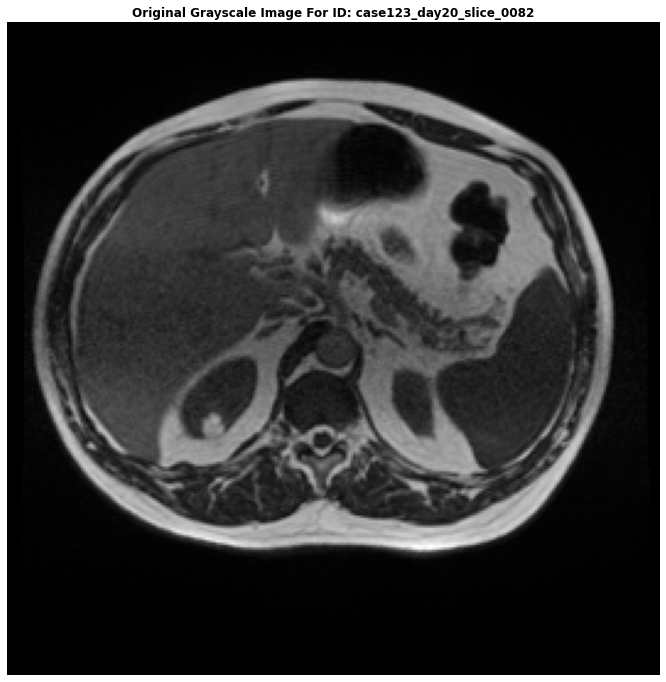



... LET'S PLOT THE 3 SEGMENTATION MASKS ...



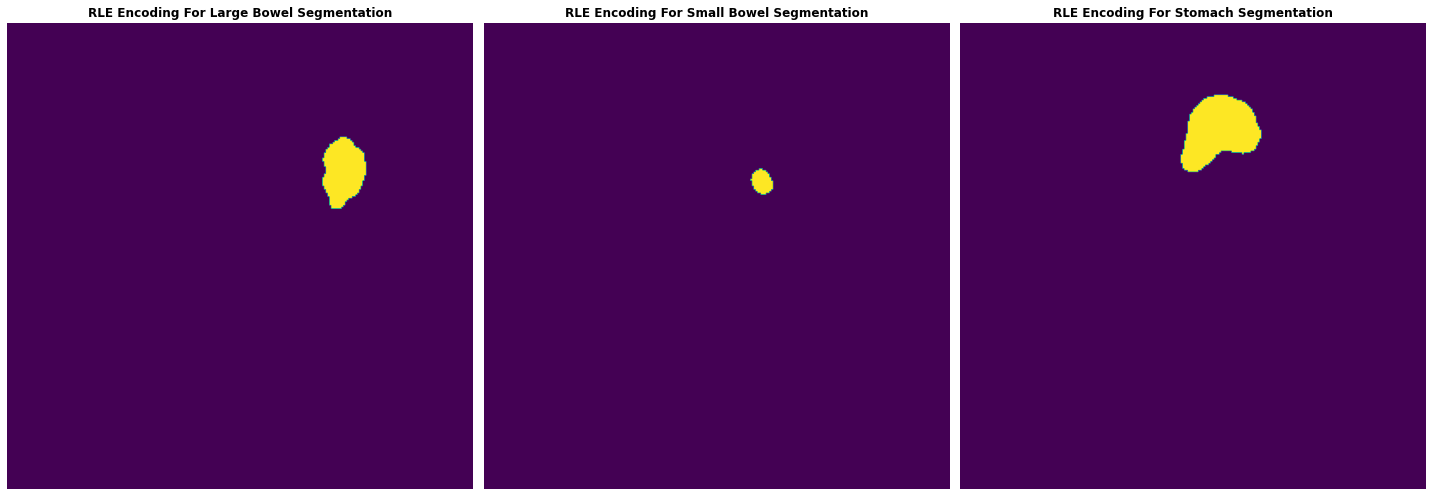



... LET'S PLOT THE IMAGE WITH AN RGB SEGMENTATION MASK OVERLAY ...



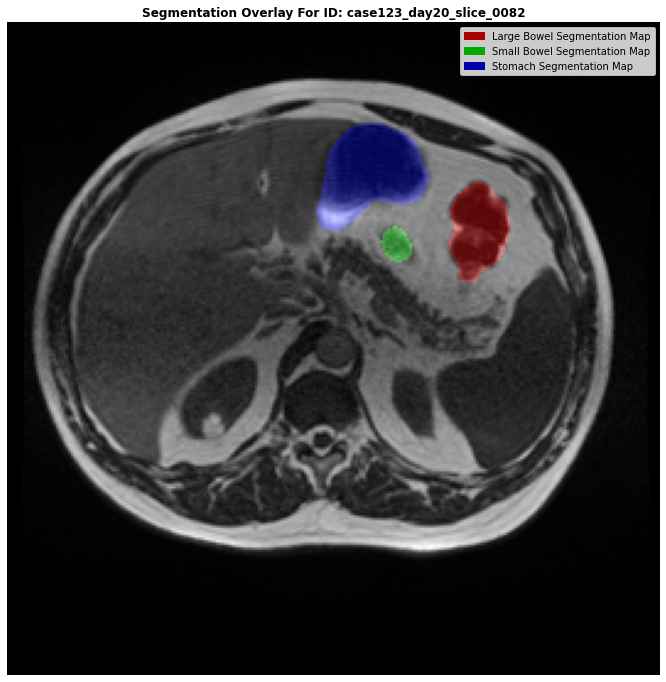



... LET'S PRINT THE RELEVANT INFORMATION ...

	--> IMAGE CASE ID              : 123
	--> IMAGE DAY NUMBER           : 20
	--> IMAGE SLICE WIDTH          : 266
	--> IMAGE SLICE HEIGHT         : 266
	--> IMAGE PIXEL SPACING WIDTH  : 1.5
	--> IMAGE PIXEL SPACING HEIGHT : 1.5


... SINGLE ID EXPLORATION FINISHED ...




In [ ]:
print("\n... SINGLE ID EXPLORATION STARTED ...\n\n")

DEMO_ID = "case123_day20_slice_0082"
demo_ex = train_df[train_df.id==DEMO_ID].squeeze()

print(f"\n... WITH DEMO_ID=`{DEMO_ID}` WE HAVE THE FOLLOWING DEMO EXAMPLE TO WORK FROM... \n\n")
display(demo_ex.to_frame())

print(f"\n\n... LET'S PLOT THE IMAGE FIRST ...\n")
plt.figure(figsize=(12,12))
plt.imshow(open_gray16(demo_ex.f_path), cmap="gray")
plt.title(f"Original Grayscale Image For ID: {demo_ex.id}", fontweight="bold")
plt.axis(False)
plt.show()

print(f"\n\n... LET'S PLOT THE 3 SEGMENTATION MASKS ...\n")

plt.figure(figsize=(20,10))
for i, _seg_type in enumerate(["lb", "sb", "st"]):
    if pd.isna(demo_ex[f"{_seg_type}_seg_rle"]): continue
    plt.subplot(1,3,i+1)
    plt.imshow(rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1))
    plt.title(f"RLE Encoding For {SF2LF[_seg_type]} Segmentation", fontweight="bold")
    plt.axis(False)
plt.tight_layout()
plt.show()

print(f"\n\n... LET'S PLOT THE IMAGE WITH AN RGB SEGMENTATION MASK OVERLAY ...\n")

# We need to normalize the loaded image values to be between 0 and 1 or else our plot will look weird
_img = open_gray16(demo_ex.f_path, to_rgb=True)
_img = ((_img-_img.min())/(_img.max()-_img.min())).astype(np.float32)
_seg_rgb = np.stack([rle_decode(demo_ex[f"{_seg_type}_seg_rle"], shape=(demo_ex.slice_w, demo_ex.slice_h), color=1) if not pd.isna(demo_ex[f"{_seg_type}_seg_rle"]) else np.zeros((demo_ex.slice_w, demo_ex.slice_h)) for _seg_type in ["lb", "sb", "st"]], axis=-1).astype(np.float32)
seg_overlay = cv2.addWeighted(src1=_img, alpha=0.99, 
                              src2=_seg_rgb, beta=0.33, gamma=0.0)

plt.figure(figsize=(12,12))
plt.imshow(seg_overlay)
plt.title(f"Segmentation Overlay For ID: {demo_ex.id}", fontweight="bold")
handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
labels = ["Large Bowel Segmentation Map", "Small Bowel Segmentation Map", "Stomach Segmentation Map"]
plt.legend(handles,labels)
plt.axis(False)
plt.show()

print(f"\n\n... LET'S PRINT THE RELEVANT INFORMATION ...\n")
print(f"\t--> IMAGE CASE ID              : {demo_ex.case_id}")
print(f"\t--> IMAGE DAY NUMBER           : {demo_ex.day_num}")
print(f"\t--> IMAGE SLICE WIDTH          : {demo_ex.slice_w}")
print(f"\t--> IMAGE SLICE HEIGHT         : {demo_ex.slice_h}")
print(f"\t--> IMAGE PIXEL SPACING WIDTH  : {demo_ex.px_spacing_w}")
print(f"\t--> IMAGE PIXEL SPACING HEIGHT : {demo_ex.px_spacing_h}")

print("\n\n... SINGLE ID EXPLORATION FINISHED ...\n\n")

# Investigating examples


... ID (case123_day20_slice_0082) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



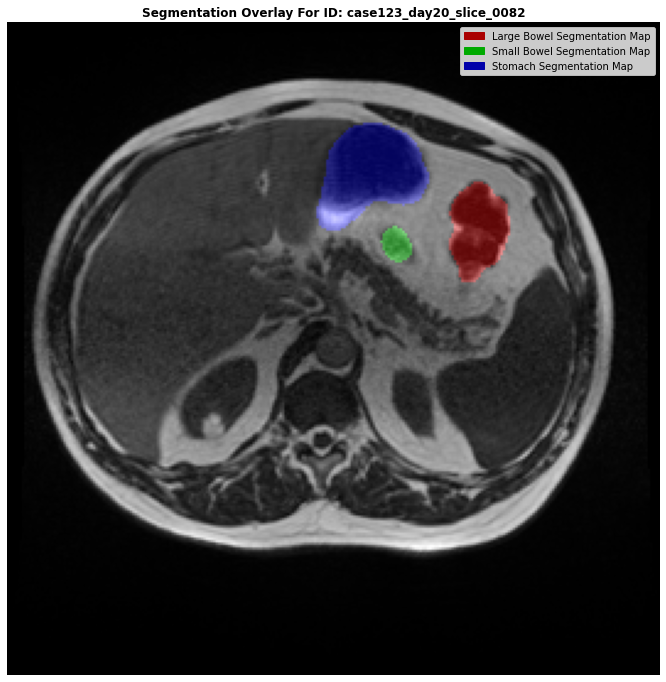



... SINGLE ID EXPLORATION FINISHED ...



... ID (case122_day25_slice_0067) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



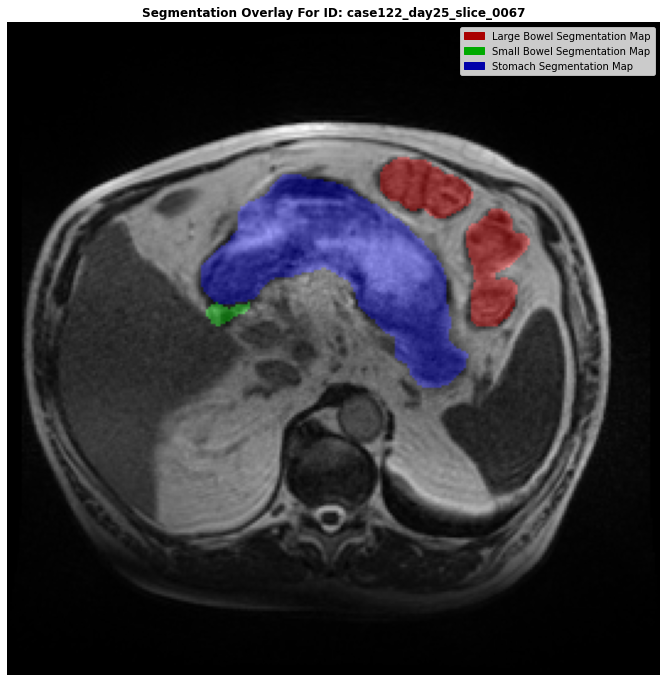



... SINGLE ID EXPLORATION FINISHED ...



... ID (case111_day19_slice_0067) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



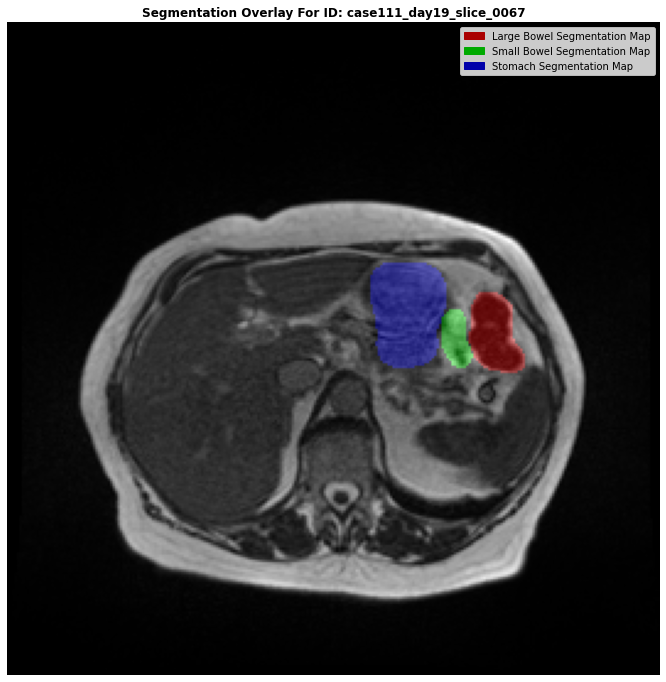



... SINGLE ID EXPLORATION FINISHED ...



... ID (case134_day22_slice_0050) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



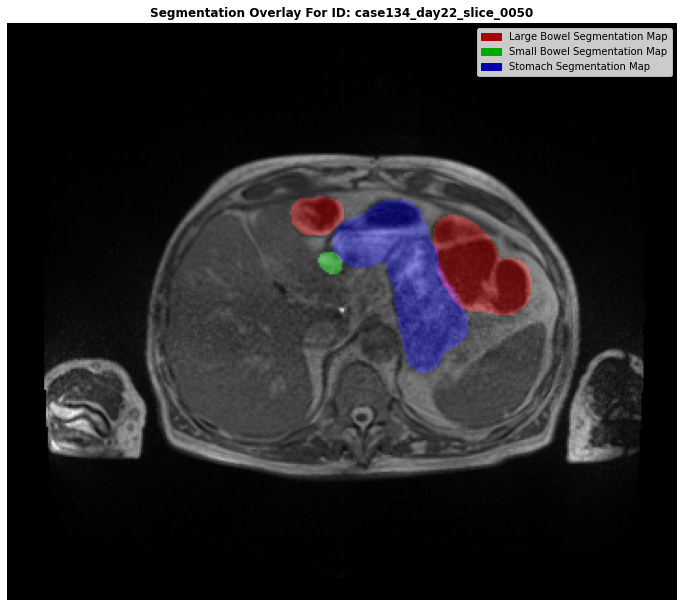



... SINGLE ID EXPLORATION FINISHED ...



... ID (case81_day0_slice_0075) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



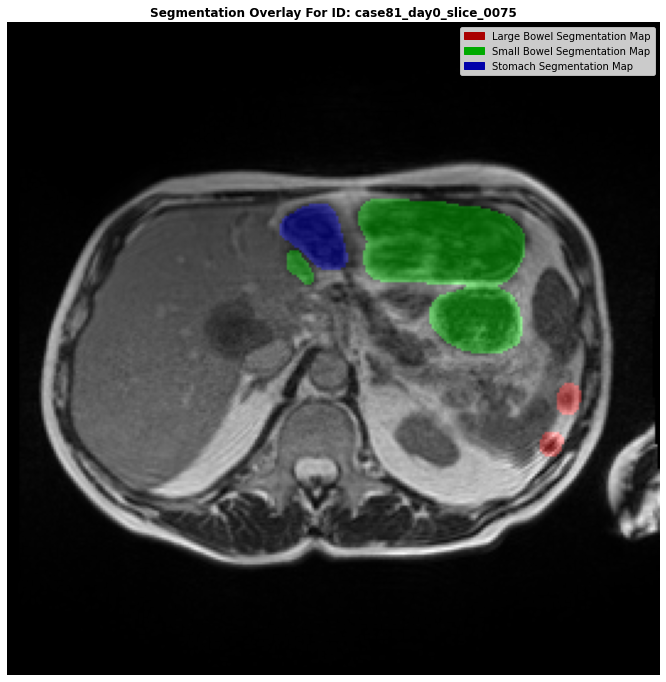



... SINGLE ID EXPLORATION FINISHED ...



... ID (case65_day28_slice_0109) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



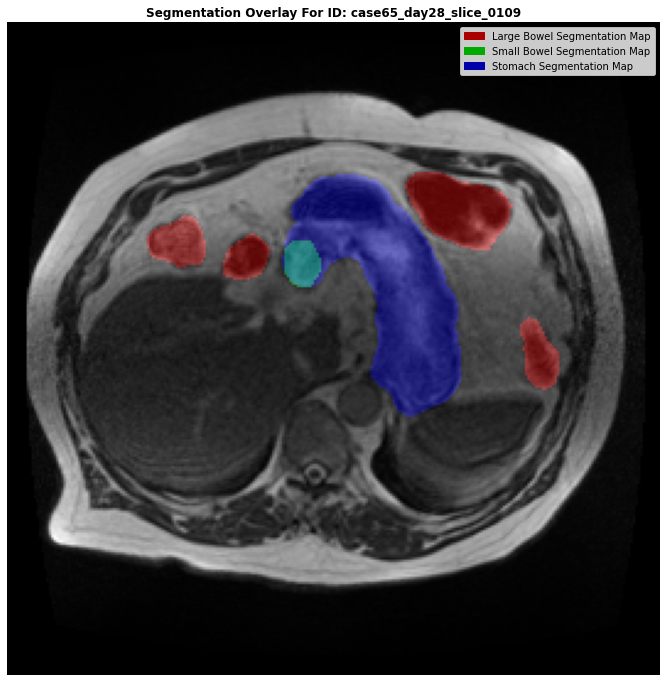



... SINGLE ID EXPLORATION FINISHED ...



... ID (case149_day15_slice_0074) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



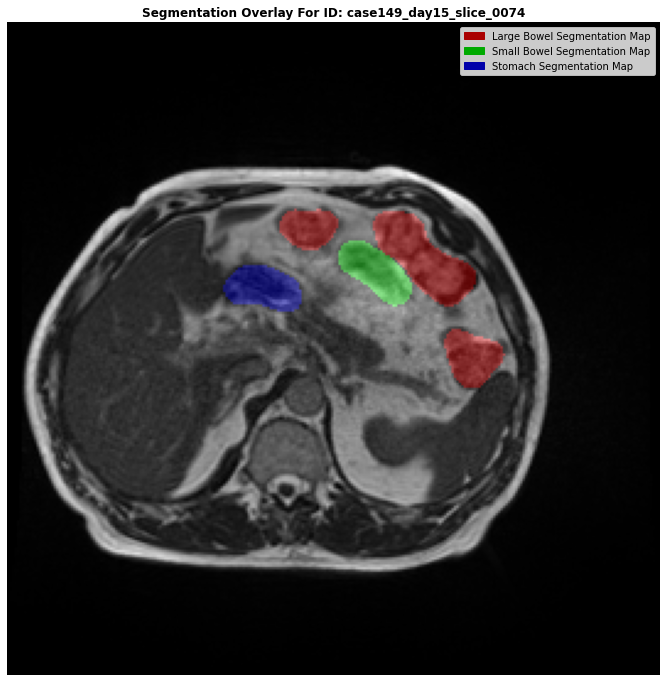



... SINGLE ID EXPLORATION FINISHED ...



... ID (case90_day0_slice_0085) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



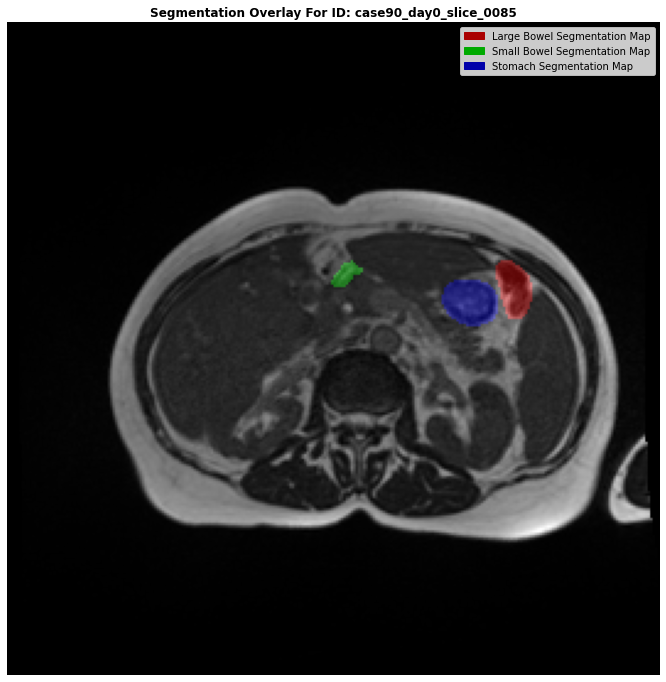



... SINGLE ID EXPLORATION FINISHED ...



... ID (case141_day27_slice_0055) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



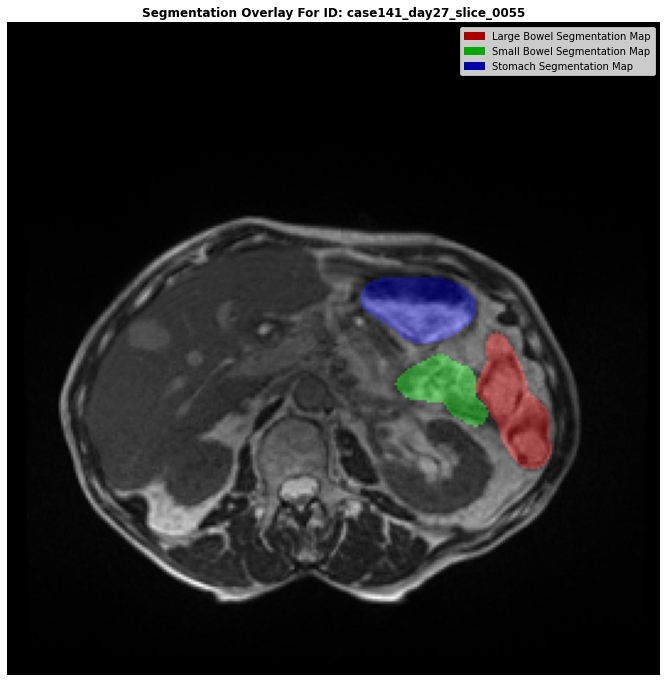



... SINGLE ID EXPLORATION FINISHED ...



... ID (case78_day22_slice_0098) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



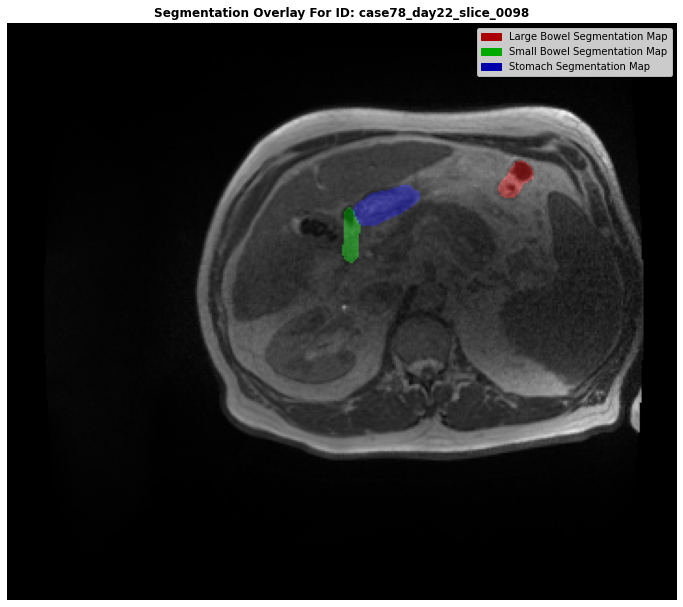



... SINGLE ID EXPLORATION FINISHED ...




In [ ]:
# Plot 10 random-ids where all tumor locales are present (max one id per case)
N_TO_PLOT = 10
for _id in train_df[train_df.n_segs==3].groupby("case_id")["id"].first().sample(N_TO_PLOT):
    examine_id(_id)

#Now performing the deatailed observation study.

In [ ]:
def get_seg_combo_str(row):
    seg_str_list = []
    if row["lb_seg_flag"]: seg_str_list.append("Large Bowel")
    if row["sb_seg_flag"]: seg_str_list.append("Small Bowel")
    if row["st_seg_flag"]: seg_str_list.append("Stomach")
    if len(seg_str_list)>0:
        return ", ".join(seg_str_list)
    else:
        return "No Mask"
train_df["seg_combo_str"] = train_df.progress_apply(get_seg_combo_str, axis=1)

fig = px.histogram(train_df, train_df["n_segs"].astype(str), color="seg_combo_str", title="<b>Number of Segmentation Masks Per Image</b>", 
                  labels={"x":"Number of Segmentation Masks Per Image", "seg_combo_str":"<b>Segmentation Masks Present</b>"})
fig.show()

  0%|          | 0/38496 [00:00<?, ?it/s]

# Investigating Image sizes

In [ ]:
fig = px.scatter(train_df.drop_duplicates(subset=["slice_w", "slice_h"]), x="slice_w", y="slice_h", 
                 size=train_df.groupby(["slice_w", "slice_h"])["id"].transform("count").iloc[train_df.drop_duplicates(subset=["slice_w", "slice_h"]).index], 
                 color="("+train_df.drop_duplicates(subset=["slice_w", "slice_h"])["slice_w"].astype(str)+","+train_df.drop_duplicates(subset=["slice_w", "slice_h"])["slice_h"].astype(str)+")", 
                 title="<b>Bubble Chart Showing The Various Image Sizes</b>",
                 labels={"color":"<b>Size Legend</b>", 
                         "size":"<b>Number Of Observations</b>",
                         "slice_h":"<b>Image Slice Height (pixels)</b>",
                         "slice_w":"<b>Image Slice Width (pixels)</b>"},
                 size_max=160)
fig.show()


... ID (case7_day0_slice_0052) EXPLORATION STARTED ...




... IMAGE WITH RGB SEGMENTATION MASK OVERLAY ...



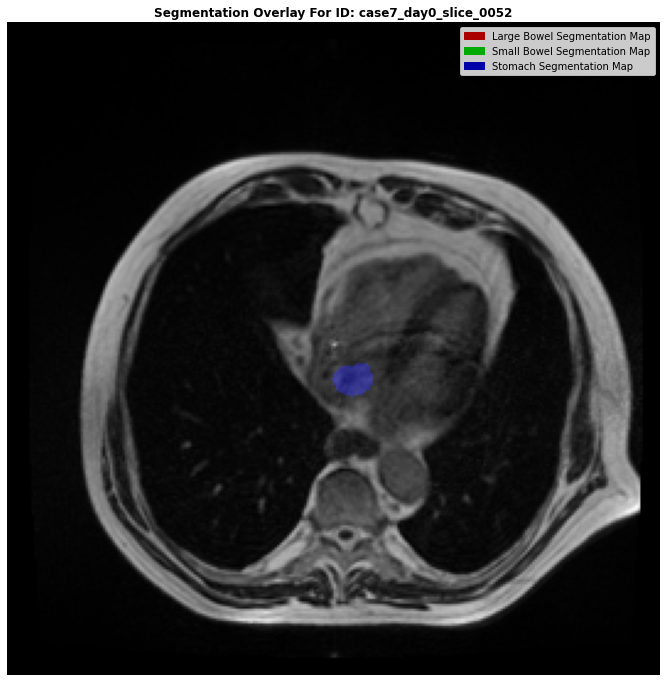



... SINGLE ID EXPLORATION FINISHED ...




In [ ]:
examine_id("case7_day0_slice_0052")

# Understanding number of slices

In [ ]:
train_df["slice_count"] = train_df.id.apply(lambda x: int(x.rsplit("_", 1)[-1]))

print("\n... CASE-ID/DAY-NUM SLICE INFORMATION ...\n")
train_df.groupby(["case_id", "day_num"])["slice_count"].max().value_counts()


... CASE-ID/DAY-NUM SLICE INFORMATION ...



144    259
80      15
Name: slice_count, dtype: int64

In [ ]:
# slice_to_occurence_df = train_df.groupby("slice_count")[["lb_seg_flag", "sb_seg_flag", "st_seg_flag"]].sum().reset_index()
fig = px.bar(slice_to_occurence_df, 
             x="slice_count", y=["lb_seg_flag", "sb_seg_flag", "st_seg_flag"],
             orientation="v", labels={
                 "slice_count":"<b>Slice Number</b>", 
                 "value":"<b>Number Of Examples</b>",
             }, title="<b>Number of Examples Per Example For Our 3 Organs</b>")

fig.update_layout(
    legend_title="<b>Organ Type Legend</b>"
)
    
fig.show()

print("\n... WHICH SLICES ARE ALWAYS BLANK (NO SEG) BY LABEL ...\n")
keep_slice_blank_map = {_sh_lbl:slice_to_occurence_df[slice_to_occurence_df[f"{_sh_lbl}_seg_flag"]==0].slice_count.to_list() for _sh_lbl in ["lb", "sb", "st"]}
keep_slice_blank_map

# Determining the class weightage

In [ ]:
# # Get total image area
train_df["img_px_area"] = train_df["slice_w"]*train_df["slice_h"]
train_df[["lb_seg_area", "sb_seg_area", "st_seg_area"]].fillna(0, inplace=True)
train_df["bg_area"] = (train_df["img_px_area"] - train_df[["lb_seg_area", "sb_seg_area", "st_seg_area"]].sum(axis=1)).astype(int)

print(f"\nALL TRAINING DATA PIXEL COUNT         : {train_df.img_px_area.sum()}")
print(f"BACKGROUND TRAINING DATA PIXEL COUNT  : {train_df.bg_area.sum()}")
print(f"LARGE BOWEL TRAINING DATA PIXEL COUNT : {train_df.lb_seg_area.sum()}")
print(f"SMALL BOWEL TRAINING DATA PIXEL COUNT : {train_df.sb_seg_area.sum()}")
print(f"STOMACH TRAINING DATA PIXEL COUNT     : {train_df.st_seg_area.sum()}\n")

print(f"\nALL TRAINING DATA PIXEL COUNT (%)         : %{100:.4f}")
print(f"BACKGROUND TRAINING DATA PIXEL COUNT (%)  : %{100*train_df.bg_area.sum()/train_df.img_px_area.sum():.4f}")
print(f"LARGE BOWEL TRAINING DATA PIXEL COUNT (%) : %{100*train_df.lb_seg_area.sum()/train_df.img_px_area.sum():.4f}")
print(f"SMALL BOWEL TRAINING DATA PIXEL COUNT (%) : %{100*train_df.sb_seg_area.sum()/train_df.img_px_area.sum():.4f}")
print(f"STOMACH TRAINING DATA PIXEL COUNT (%)     : %{100*train_df.st_seg_area.sum()/train_df.img_px_area.sum():.4f}\n")


ALL TRAINING DATA PIXEL COUNT         : 3186782784
BACKGROUND TRAINING DATA PIXEL COUNT  : 3133646797
LARGE BOWEL TRAINING DATA PIXEL COUNT : 21933578.0
SMALL BOWEL TRAINING DATA PIXEL COUNT : 20080562.0
STOMACH TRAINING DATA PIXEL COUNT     : 11121847.0


ALL TRAINING DATA PIXEL COUNT (%)         : %100.0000
BACKGROUND TRAINING DATA PIXEL COUNT (%)  : %98.3326
LARGE BOWEL TRAINING DATA PIXEL COUNT (%) : %0.6883
SMALL BOWEL TRAINING DATA PIXEL COUNT (%) : %0.6301
STOMACH TRAINING DATA PIXEL COUNT (%)     : %0.3490

